<a href="https://colab.research.google.com/github/Micro-Maxis/Intrusion-detection-system-dli/blob/main/DLI_nn%2Brf%2Bxgb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
!git clone https://github.com/mohammedAcheddad/AI-Based-Network-IDS_ML-DL.git


Cloning into 'AI-Based-Network-IDS_ML-DL'...
remote: Enumerating objects: 103, done.
remote: Counting objects: 100% (103/103), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 103 (delta 52), reused 70 (delta 30), pack-reused 0 (from 0)
Receiving objects: 100% (103/103), 7.98 MiB | 12.42 MiB/s, done.
Resolving deltas: 100% (52/52), done.


Change Directory to GitHub Folder with code

In [3]:
!ls

BinaryPrediction.ipynb	MulticlassPrediction.ipynb  README.md
LICENSE			nsl-kdd			    script.py


List out the files for verification

In [4]:
!pip install tensorflow
!pip install --upgrade imbalanced-learn
!pip install scikit-learn==1.3.2 scikeras==0.12.0

ERROR: Ignored the following versions that require a different python version: 0.10.0 Requires-Python >=3.7.0,<3.11.0; 0.11.0 Requires-Python >=3.8.0,<3.12.0; 0.12.0 Requires-Python >=3.8.0,<3.12.0; 0.2.0 Requires-Python >=3.6.7,<3.9; 0.2.1 Requires-Python >=3.6.7,<3.9; 0.6.0 Requires-Python >=3.7.0,<3.10.0; 0.6.1 Requires-Python >=3.7.0,<3.10.0; 0.7.0 Requires-Python >=3.7.0,<3.10.0; 0.8.0 Requires-Python >=3.7.0,<3.11.0; 0.9.0 Requires-Python >=3.7.0,<3.11.0
ERROR: Could not find a version that satisfies the requirement scikeras==0.12.0 (from versions: 0.1.6, 0.1.7, 0.1.8, 0.3.0, 0.3.1, 0.3.3, 0.4.0, 0.4.1, 0.13.0)
ERROR: No matching distribution found for scikeras==0.12.0


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Machine Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Display settings
pd.set_option('display.max_columns', None)
plt.style.use('default')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")
print(f"📊 TensorFlow Version: {tf.__version__}")
print(f"🐼 Pandas Version: {pd.__version__}")
print(f"🔬 Scikit-learn available")

✅ All libraries imported successfully!
📊 TensorFlow Version: 2.19.0
🐼 Pandas Version: 2.2.2
🔬 Scikit-learn available


In [6]:
# Read Train and Test dataset
data_train = pd.read_csv("nsl-kdd/KDDTrain+.txt")
# Check data
data_train.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.18,2,2.1,0.00,0.00.1,0.00.2,0.00.3,1.00,0.00.4,0.00.5,150,25,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [7]:
with open("nsl-kdd/KDDTrain+.txt", 'r', encoding='utf-8') as f:
    line_count = sum(1 for line in f)

print(f"The total number of lines is: {line_count}")

The total number of lines is: 125973


Checking if dataset is met with requirements, which is 10k lines at least

In [8]:
# NSL-KDD Dataset Column Names
NSL_KDD_COLUMNS = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
    'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins',
    'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
    'num_root', 'num_file_creations', 'num_shells', 'num_access_files',
    'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
    'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
    'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
    'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
    'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate', 'attack_type', 'difficulty'
]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


Assigning column heads for the dataset and view the outcome

In [9]:
# Checking for any missing values
missing_values = data_train.isnull().sum()
print(missing_values)

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [10]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

See data info to understand the data type, knowing if its catergorical or numerical

In [11]:
data_train.describe().style.background_gradient(cmap='Blues').set_properties(**{'font-family':'Segoe UI'})

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,45567.100824,19779.271433,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,0.001342,0.001103,0.302194,0.012669,0.000413,0.004096,0.000000,0.000008,0.009423,84.108207,27.738093,0.284487,0.282488,0.119959,0.121184,0.660925,0.063053,0.097322,182.149200,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241,19.504056
std,2604.525522,5870354.480802,4021285.112110,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,0.036603,0.045155,24.399715,0.483937,0.022181,0.099370,0.000000,0.002817,0.096613,114.508828,72.636092,0.446457,0.447024,0.320437,0.323648,0.439624,0.180315,0.259831,99.206565,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460,2.291512
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,276.000000,516.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.000000,1379963888.000000,1309937401.000000,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.000000,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


Get a basic idea of the mean, std, min, max of the dataset. Understanding the data distribution can help with feature scaling later on.

In [12]:
# @title
#Data Preprocessing Begins:
data_train.loc[data_train['outcome'] == "normal", "outcome"] = 'normal'
data_train.loc[data_train['outcome'] != 'normal', "outcome"] = 'attack'

Because this model only works as a binary classification, therefore we will flag anything else then normal, as an attack, so our dependent variable will be this outcome, either "normal" or "attack"

In [13]:
def Scaling(df_num, cols):
    std_scaler = RobustScaler()
    std_scaler_temp = std_scaler.fit_transform(df_num)
    std_df = pd.DataFrame(std_scaler_temp, columns =cols)
    return std_df

takes your numerical data, scales it to a common range, and returns it as a new DataFrame, making it ready for a machine learning model that is sensitive to different feature scales.

In [14]:
cat_cols = ['is_host_login','protocol_type','service','flag','land', 'logged_in','is_guest_login', 'level', 'outcome']
def preprocess(dataframe):
    df_num = dataframe.drop(cat_cols, axis=1)
    num_cols = df_num.columns
    scaled_df = Scaling(df_num, num_cols)

    dataframe.drop(labels=num_cols, axis="columns", inplace=True)
    dataframe[num_cols] = scaled_df[num_cols]
    dataframe.dropna(inplace=True)
    dataframe.drop_duplicates(inplace=True)

    dataframe.loc[dataframe['outcome'] == "normal", "outcome"] = 0
    dataframe.loc[dataframe['outcome'] != 0, "outcome"] = 1

    dataframe = pd.get_dummies(dataframe, columns = ['protocol_type', 'service', 'flag'])
    return dataframe

cat_cols refer to columns in the dataset that are categorical data
df_num here is all the numerical data so we use dataframe.drop(cat_cols) to drop the categorical data, so the df_num will be left with num data.
Next we using the scaling function we defined just now and use robust scaler to do feature scaling on the df_num.

dataframe.dropna(inplace=True): This removes all rows that contain any missing or NaN values. The inplace=True argument modifies the DataFrame directly.

dataframe.drop_duplicates(inplace=True): This removes any rows that are identical to other rows in the DataFrame, ensuring that each entry is unique.

  dataframe.loc[dataframe['outcome'] == "normal", "outcome"] = 0
    dataframe.loc[dataframe['outcome'] != 0, "outcome"] = 1
these two lines just set the categorical data of the dependent varible "outcome" as 0s (normal) or 1s (attack)

 dataframe = pd.get_dummies(dataframe, columns = ['protocol_type', 'service', 'flag'])
 This line does one-hot encoding on the specific columns.

In [15]:
scaled_train = preprocess(data_train)
scaled_train

,land,logged_in,is_host_login,is_guest_login,outcome,level,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,0,0,0,0,15,0.0,0.369565,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.007092,-0.4375,0.0,0.0,0.0,0.0,-1.010989,2.500000,0.00,0.000000,-0.253061,-0.536842,8.285714,14.666667,0.0,0.00,0.00,0.00,0.00,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,0,0,0,0,1,19,0.0,-0.159420,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.773050,-0.1250,1.0,1.0,0.0,0.0,-1.043956,1.166667,0.00,0.000000,-0.151020,-0.431579,0.428571,0.000000,0.0,1.00,1.00,0.00,0.00,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,0,1,0,0,0,21,0.0,0.681159,15.800388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.063830,-0.1875,0.2,0.2,0.0,0.0,0.000000,0.000000,0.00,-1.300578,0.783673,0.515789,-0.285714,0.500000,2.0,0.03,0.01,0.00,0.01,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,0,1,0,0,0,21,0.0,0.561594,0.813953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [16]:
#separating independent variable and dependent variable
x = scaled_train.drop(['outcome', 'level'] , axis = 1).values
y = scaled_train['outcome'].values
y_reg = scaled_train['level'].values

#dimension reduction
pca = PCA(n_components=20)
pca = pca.fit(x)
x_reduced = pca.transform(x)
print("Number of original features is {} and of reduced features is {}".format(x.shape[1], x_reduced.shape[1]))

#Spiliting training set and test set, 80% training set, 20% testing set
y = y.astype('int')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced = train_test_split(x_reduced, y, test_size=0.2, random_state=42)
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x, y_reg, test_size=0.2, random_state=42)

Number of original features is 122 and of reduced features is 20


In [17]:
#Building neural network model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dropout(0.2))  # Prevent overfitting
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [18]:
#Standardize features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

StandardScaler fit only on train data (right now you’re fitting separately on train & test, which leaks information).

In [19]:
# Reduce LR if validation loss stops improving
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    verbose=1,
    min_lr=1e-6
)

it adjusts the learning rate automatically without you having to change your optimizer manually.

In [20]:
#CNN Model Training
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_split=0.2, epochs=20, batch_size=64, callbacks=[lr_scheduler])

Epoch 1/20
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9602 - loss: 0.1149 - val_accuracy: 0.9901 - val_loss: 0.0257 - learning_rate: 0.0010
Epoch 2/20
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9905 - loss: 0.0275 - val_accuracy: 0.9914 - val_loss: 0.0218 - learning_rate: 0.0010
Epoch 3/20
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9918 - loss: 0.0228 - val_accuracy: 0.9923 - val_loss: 0.0187 - learning_rate: 0.0010
Epoch 4/20
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9926 - loss: 0.0216 - val_accuracy: 0.9940 - val_loss: 0.0179 - learning_rate: 0.0010
Epoch 5/20
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9926 - loss: 0.0196 - val_accuracy: 0.9942 - val_loss: 0.0157 - learning_rate: 0.0010
Epoch 6/20
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9932 - loss: 0.0174 - val_accuracy: 0.9942 - val_loss: 0.0153 - learning_rate: 0.0010
Epoch 7/20
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9937 - 

In [21]:
#Feature Extractor
from tensorflow.keras.models import Model
import numpy as np

# Create feature extractor model using the input layer and the second-to-last layer's output
# Access the input layer by index (usually 0 for Sequential models)
input_layer = model.layers[0]
# Access the second-to-last layer by index
feature_output_layer = model.layers[-2]

# Ensure the model is built before creating the feature extractor by calling it with dummy input
# This is still necessary to define the tensor shapes
dummy_input = x_train[:1]
model.predict(dummy_input)

# Create feature extractor model
feature_extractor = Model(inputs=input_layer.input, outputs=feature_output_layer.output)

# Extract features for train & test sets
train_features = feature_extractor.predict(x_train)
test_features = feature_extractor.predict(x_test)

print("Extracted feature shape:", train_features.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
3150/3150 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
788/788 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Extracted feature shape: (100770, 32)


Using the NN as a feature extractor

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(train_features, y_train)

# Predict
y_pred_rf = rf.predict(test_features)

# Evaluate
print("Random Forest on NN features:")
print(classification_report(y_test, y_pred_rf))


Random Forest on NN features:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13369
           1       1.00      1.00      1.00     11824

    accuracy                           1.00     25193
   macro avg       1.00      1.00      1.00     25193
weighted avg       1.00      1.00      1.00     25193



 Train Random Forest on NN features

In [23]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_model.fit(train_features, y_train)

y_pred_xgb = xgb_model.predict(test_features)

print("XGBoost on NN features:")
print(classification_report(y_test, y_pred_xgb))

XGBoost on NN features:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13369
           1       1.00      1.00      1.00     11824

    accuracy                           1.00     25193
   macro avg       1.00      1.00      1.00     25193
weighted avg       1.00      1.00      1.00     25193



Train XGBoost for comparison

3150/3150 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
788/788 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Training Metrics for CNN:
Accuracy: 99.68%, Precision: 99.77%, Recall: 99.55%, F1 Score: 99.66%
Testing Metrics for CNN:
Accuracy: 99.54%, Precision: 99.63%, Recall: 99.38%, F1 Score: 99.50%


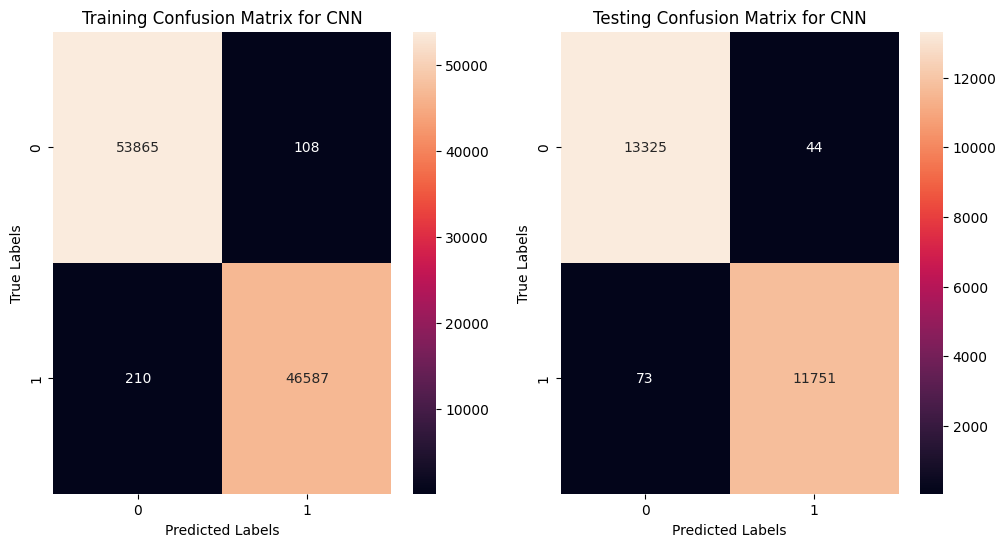

Training Metrics for XGBoost:
Accuracy: 99.90%, Precision: 99.92%, Recall: 99.87%, F1 Score: 99.89%
Testing Metrics for XGBoost:
Accuracy: 99.64%, Precision: 99.66%, Recall: 99.58%, F1 Score: 99.62%


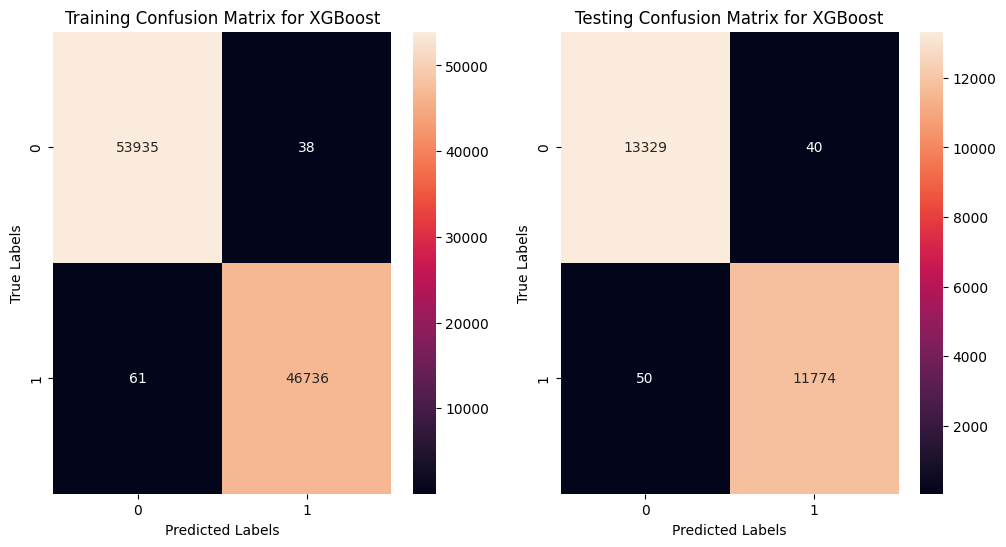

In [25]:
#Model Evaluation
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

def evaluate_classification(model, name, X_train, X_test, y_train, y_test, is_nn=False):
    if is_nn:
        # Neural nets output probabilities → need threshold
        train_pred = (model.predict(X_train) > 0.5).astype("int32")
        test_pred  = (model.predict(X_test) > 0.5).astype("int32")
    else:
        # Tree-based models output class labels directly
        train_pred = model.predict(X_train)
        test_pred  = model.predict(X_test)

    # Metrics
    train_accuracy = metrics.accuracy_score(y_train, train_pred)
    train_precision = metrics.precision_score(y_train, train_pred)
    train_recall = metrics.recall_score(y_train, train_pred)
    train_f1 = metrics.f1_score(y_train, train_pred)

    test_accuracy = metrics.accuracy_score(y_test, test_pred)
    test_precision = metrics.precision_score(y_test, test_pred)
    test_recall = metrics.recall_score(y_test, test_pred)
    test_f1 = metrics.f1_score(y_test, test_pred)

    # Print metrics
    print(f"Training Metrics for {name}:")
    print(f"Accuracy: {train_accuracy*100:.2f}%, Precision: {train_precision*100:.2f}%, Recall: {train_recall*100:.2f}%, F1 Score: {train_f1*100:.2f}%")
    print(f"Testing Metrics for {name}:")
    print(f"Accuracy: {test_accuracy*100:.2f}%, Precision: {test_precision*100:.2f}%, Recall: {test_recall*100:.2f}%, F1 Score: {test_f1*100:.2f}%")

    # Confusion matrices
    train_confusion_matrix = metrics.confusion_matrix(y_train, train_pred)
    test_confusion_matrix = metrics.confusion_matrix(y_test, test_pred)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.heatmap(train_confusion_matrix, annot=True, fmt='g')
    plt.title(f'Training Confusion Matrix for {name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')

    plt.subplot(1, 2, 2)
    sns.heatmap(test_confusion_matrix, annot=True, fmt='g')
    plt.title(f'Testing Confusion Matrix for {name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()


# CNN
evaluate_classification(model, "CNN", x_train, x_test, y_train, y_test, is_nn=True)

# XGBoost
evaluate_classification(xgb_model, "XGBoost", train_features, test_features, y_train, y_test)
